# Lattice Visualisation Playground

Interactive companion to the automated lattice visualisation tests.  Use these cells to inspect
real-space layouts, reciprocal-space grids, and Brillouin-zone approximations for a few supported
lattice types under different boundary conditions.


## 1. Imports & Styling
A single setup cell so subsequent sections focus purely on the physics objects and plots.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
from IPython.display import Markdown, display

from QES.general_python.lattices import (
    LatticePlotter,
    LatticeBC,
    SquareLattice,
    HexagonalLattice,
    HoneycombLattice,
    format_lattice_summary,
    format_real_space_vectors,
    format_reciprocal_space_vectors,
    format_brillouin_zone_overview,
)


## 2. Construct Sample Lattices
We explore both periodic (PBC) and open (OBC) boundary conditions, plus two alternative lattice
geometries to ensure the helpers behave well beyond simple squares.

In [2]:
lattices = {
    "Square (PBC)": SquareLattice(dim=2, lx=4, ly=4, bc=LatticeBC.PBC),
    "Square (OBC)": SquareLattice(dim=2, lx=4, ly=4, bc=LatticeBC.OBC),
    "Honeycomb (PBC)": HoneycombLattice(dim=2, lx=3, ly=3, lz=1, bc=LatticeBC.PBC),
}

display(Markdown("### Created lattices"))
for name, lattice in lattices.items():
    print(f"{name}: {lattice}")


### Created lattices

Square (PBC): SQ,LatticeBC.PBC,d=2,Ns=16,Lx=4,Ly=4,Lz=1
Square (OBC): SQ,LatticeBC.OBC,d=2,Ns=16,Lx=4,Ly=4,Lz=1
Honeycomb (PBC): HON,LatticeBC.PBC,d=2,Ns=18,Lx=3,Ly=3,Lz=1


## 3. Textual Summaries
Quick inspection of stored metadata, real-/reciprocal-space vectors, and Brillouin-zone coverage.

In [3]:
for name, lattice in lattices.items():
    display(Markdown(f"### {name}"))
    print(format_lattice_summary(lattice))
    display(Markdown("**Real-space vectors (first 6 rows):**"))
    print(format_real_space_vectors(lattice, max_rows=6))
    display(Markdown("**Reciprocal-space vectors (first 6 rows):**"))
    print(format_reciprocal_space_vectors(lattice, max_rows=6))
    display(Markdown("**Brillouin-zone overview:**"))
    print(format_brillouin_zone_overview(lattice))


### Square (PBC)

Lattice type: SQUARE
Dimensions: d=2 (Lx=4, Ly=4, Lz=1) sites=16
Boundary: PBC periodic flags=(True, True, True)
a1: (1.000, 0.000, 0.000)
a2: (0.000, 1.000, 0.000)
b1: (0.000, 0.000, 0.000)
b2: (0.000, 0.000, 0.000)
Boundary flux: none
Stored coordinates: 16 entries


**Real-space vectors (first 6 rows):**

#	x	y
   0	0.000	0.000
   1	1.000	0.000
   2	2.000	0.000
   3	3.000	0.000
   4	0.000	1.000
   5	1.000	1.000
... (10 more rows)


**Reciprocal-space vectors (first 6 rows):**

#	x	y
   0	-3.142	-3.142
   1	-3.142	-1.571
   2	-3.142	0.000
   3	-3.142	1.571
   4	-1.571	-3.142
   5	-1.571	-1.571
... (10 more rows)


**Brillouin-zone overview:**

Reciprocal-space bounds: x: [-3.142, 1.571], y: [-3.142, 1.571]
Convex hull area: 22.207


### Square (OBC)

Lattice type: SQUARE
Dimensions: d=2 (Lx=4, Ly=4, Lz=1) sites=16
Boundary: OBC periodic flags=(False, False, False)
a1: (1.000, 0.000, 0.000)
a2: (0.000, 1.000, 0.000)
b1: (0.000, 0.000, 0.000)
b2: (0.000, 0.000, 0.000)
Boundary flux: none
Stored coordinates: 16 entries


**Real-space vectors (first 6 rows):**

#	x	y
   0	0.000	0.000
   1	1.000	0.000
   2	2.000	0.000
   3	3.000	0.000
   4	0.000	1.000
   5	1.000	1.000
... (10 more rows)


**Reciprocal-space vectors (first 6 rows):**

#	x	y
   0	-3.142	-3.142
   1	-3.142	-1.571
   2	-3.142	0.000
   3	-3.142	1.571
   4	-1.571	-3.142
   5	-1.571	-1.571
... (10 more rows)


**Brillouin-zone overview:**

Reciprocal-space bounds: x: [-3.142, 1.571], y: [-3.142, 1.571]
Convex hull area: 22.207


### Honeycomb (PBC)

Lattice type: HONEYCOMB
Dimensions: d=2 (Lx=3, Ly=3, Lz=1) sites=18
Boundary: PBC periodic flags=(True, True, True)
a1: (0.866, 1.500, 0.000)
a2: (-0.866, 1.500, 0.000)
b1: (6.283, 0.000, 0.000)
b2: (-3.142, 5.441, 0.000)
Boundary flux: none
Stored coordinates: 18 entries


**Real-space vectors (first 6 rows):**

#	x	y
   0	0.000	0.000
   1	0.000	1.000
   2	0.866	1.500
   3	0.866	2.500
   4	1.732	3.000
   5	1.732	4.000
... (12 more rows)


**Reciprocal-space vectors (first 6 rows):**

#	x	y
   0	-3.142	-3.142
   1	-3.142	-1.047
   2	-3.142	1.047
   3	-1.047	-3.142
   4	-1.047	-1.047
   5	-1.047	1.047
... (3 more rows)


**Brillouin-zone overview:**

Reciprocal-space bounds: x: [-3.142, 1.047], y: [-3.142, 1.047]
Convex hull area: 17.546


## 4. Plotting Showcase
Each lattice is rendered using the convenience wrapper so you can compare real space, reciprocal
space, Brillouin zone, and boundary-aware structure plots.

### Square (PBC)

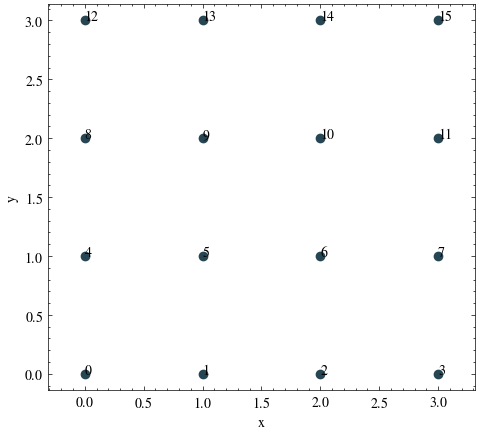

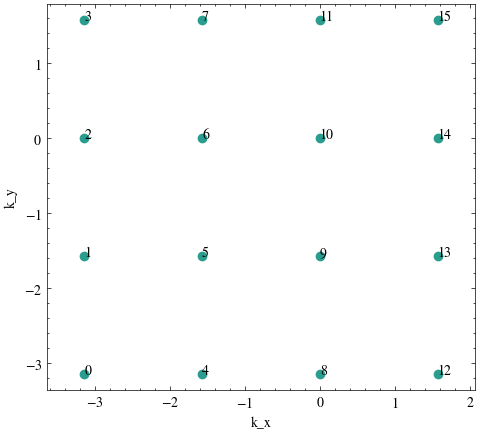

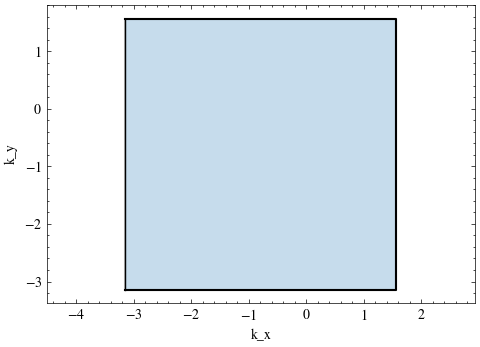

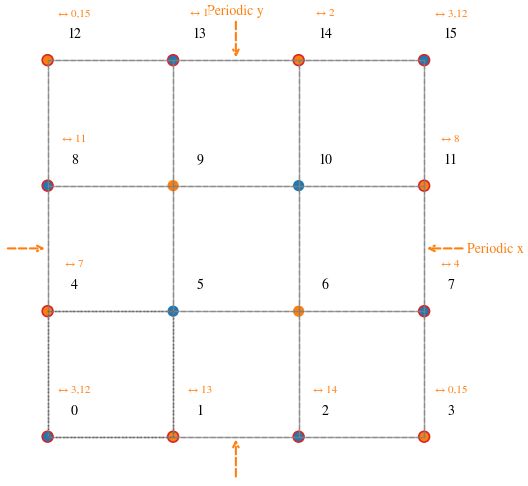

### Square (OBC)

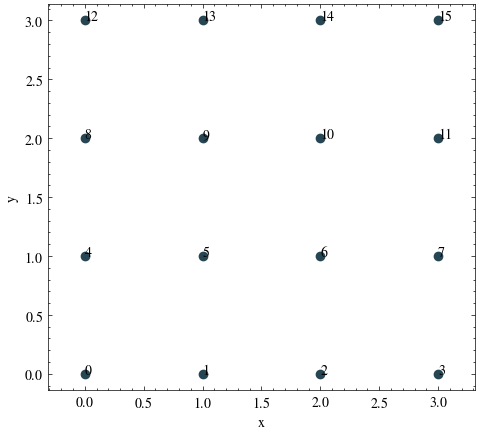

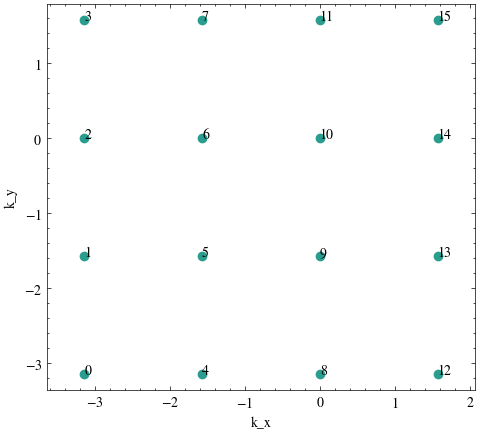

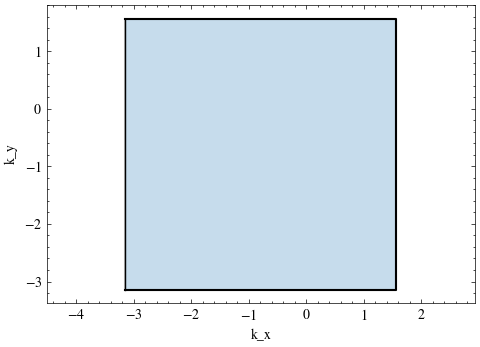

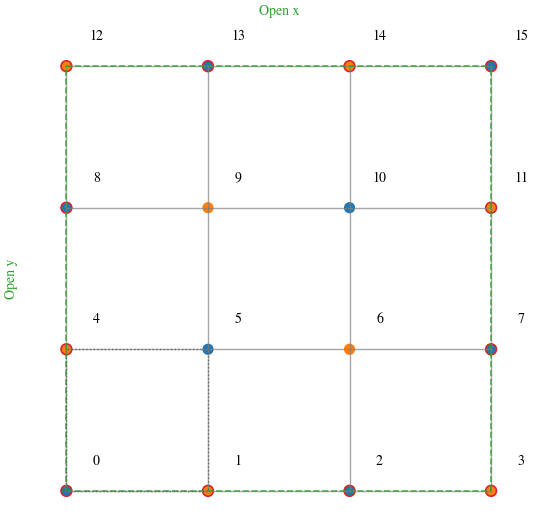

### Honeycomb (PBC)

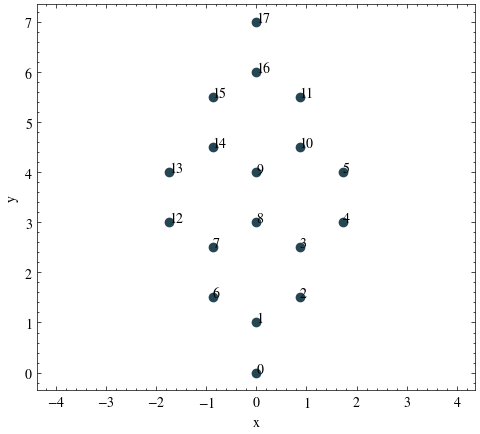

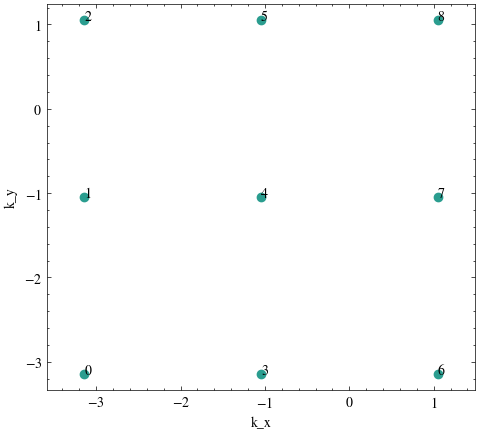

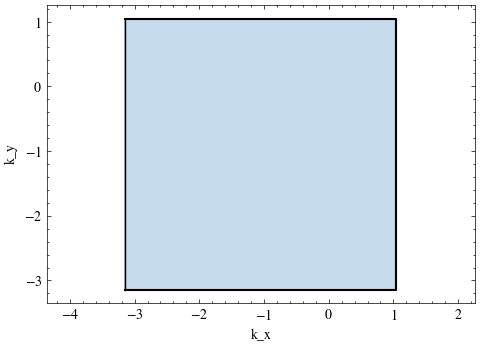

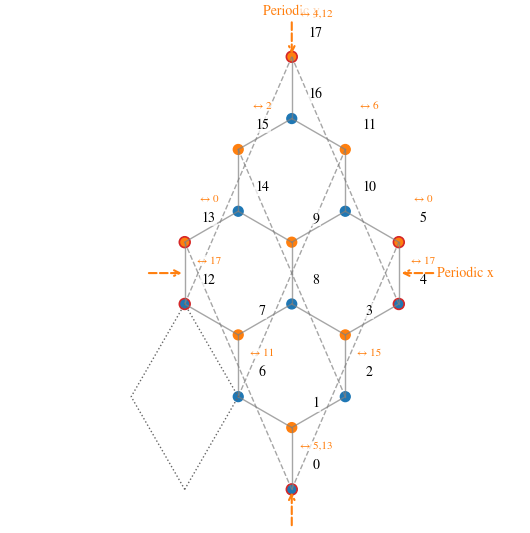

In [4]:
for name, lattice in lattices.items():
    display(Markdown(f"### {name}"))
    plotter = LatticePlotter(lattice)

    figs = []
    figs.append(plotter.real_space(show_indices=True))
    figs.append(plotter.reciprocal_space(show_indices=True))
    figs.append(plotter.brillouin_zone())
    figs.append(plotter.structure(show_indices=True))

    for fig, ax in figs:
        plt.show()
        plt.close(fig)


## 5. 3D glimpse

A simple 3D example using a cubic lattice. The view can be tuned via
`elev`/`azim` arguments to the plotter helpers.

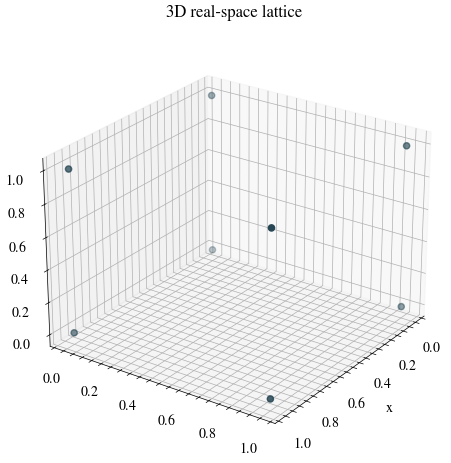

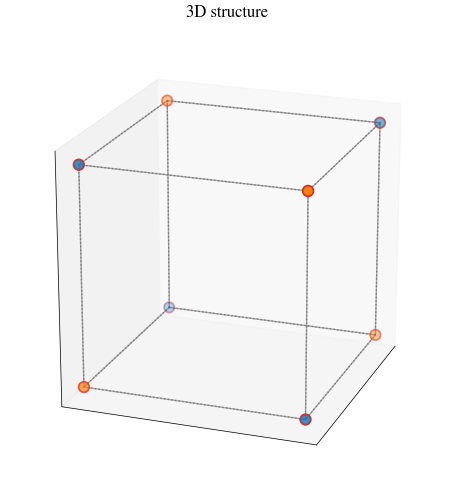

In [5]:
cube = SquareLattice(dim=3, lx=2, ly=2, lz=2, bc=LatticeBC.OBC)
plotter3d = LatticePlotter(cube)
fig_rs, ax_rs = plotter3d.real_space(elev=25, azim=35, title='3D real-space lattice', figsize=(5.5, 5.0))
plt.show()

fig_struct, ax_struct = plotter3d.structure(show_indices=False, elev=20, azim=20,title='3D structure', figsize=(5.5, 5.0))
plt.show()
